# Data Mining Challenge 2020

## Team
* First-name Last-name Student-ID
* ...



# section one 
apply the desired libraries 

In [3]:
import pandas as pd
import numpy as np

# Statistical libraries
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn.preprocessing import power_transform

In [81]:
from sklearn.ensemble import ExtraTreesRegressor

# Section two
Defin the functions that we will use through out our code 

In [6]:
# print the confusion Matrix
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=-1):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])    

def PrintSignificance(stat, c):
    if (stat[1]<(1-c)):
        print("The difference is statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))
    else:
        print("The difference is not statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))    

In [7]:
# model training 
def train_model(methods, x_t,y_t, x_te, y_te):
    xval_results = {}
    roc_results = {}
    feature_importance_model = {}

    method = []
    accuracy_mean = []
    accuracy_std = []
    precision = []
    recall = []
    f1 = []
    auc = []

    for method_name in methods:


        clf = methods[method_name];

        # evaluate the model using crossvalidation
        xval_score = cross_val_score(clf,X,y,cv=crossvalidation)

        # store the raw results of crossvalidation that we might want to use for t-test/mann-whitney comparison
        xval_results[method_name] = xval_score

        # compute the basic statistics
        accuracy_mean.append(np.average(xval_score))
        accuracy_std.append(np.std(xval_score))

        clf.fit(x_t,y_t)

        # if the mode can return an evaluation of feature importance we store it to analyze it later
        if hasattr(clf, 'feature_importances_'):
                feature_importance_model[method_name] = (clf,clf.feature_importances_)

        # compute the prediction which, for probabilistic classifiers, is using a threshold of 0.5
        yp = clf.predict(x_te)

        # ask for the probability values
        yprob = clf.predict_proba(x_te)

        # computes the data needed to draw the ROC curve
        fpr_nb, tpr_nb, thresholds = roc_curve(y_true=y_te, y_score = yprob[:,1], pos_label=1)

        # computes the AUC 
        roc_auc = roc_auc_score(y_true=y_te, y_score = yprob[:,1])
        auc.append(roc_auc)

        # store the information to plot the ROC curves afterwards
        roc_results[method_name] = (fpr_nb, tpr_nb, thresholds, roc_auc)

        precision.append(precision_score(y_te,yp))
        recall.append(recall_score(y_te,yp))
        f1.append(f1_score(y_te, yp))

        print("%40s"%method_name)
        print("========================================")
        print("\t  Accuracy (CV) %.3f %.3f"%(np.average(xval_score),np.std(xval_score)))
        print("\tAccuracy (Test) %.3f"%precision_score(y_test, yp))
        print("\t      Precision %.3f"%precision_score(y_test, yp))
        print("\t      Recall    %.3f"%recall_score(y_test, yp))
        print("\t      F1        %.3f"%f1_score(y_test, yp))
        print("\n")

        method.append(method_name)

This function print all the datas 

In [8]:
def print_all (to_print):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(to_print)

In [9]:
def print_his(dat0a, bins):
    hist1 = sns.distplot(data,bins=bins)

prints the number of number of columns without any outliers

In [10]:
def print_clean_col(X,mean,std):
    lower = mean - 3*std
    upper = mean + 3*std
    i=0
    for col in X.columns:
        outliers = ((X[col]>upper[col]) | (X[col]<lower[col])).astype(int)
        
        if (outliers.sum()>0):
            print("Variable %s (%.3f,%.3f) has %d outliers"%(col,mean[col],std[col],outliers.sum()))
        else:
            i+=1
    print('the number of cleaned columns are ', i)

In [11]:
def replace_outliers(S,mean,std):
    X =S.copy()
    lower = mean - 3*std
    upper = mean + 3*std
    for col in X.columns:
        X.loc[X[col]>upper[col], col] = upper[col]
        X.loc[X[col]<lower[col], col] = lower[col]
    
    return X

In [12]:
# sort Numerical values function
def sorted_m3_numerical_values(numerical_df, reverse = True):
    sorted_Numerical_df = numerical_df.reindex(sorted(numerical_df.columns, reverse=reverse), axis=1)
    sorted_Numerical_columns_list = (list(sorted_Numerical_df.columns))
    New_Numerical_columns_list = []
    for column in sorted_Numerical_columns_list:
        New_column = column.replace('_',' ')
        New_Numerical_columns_list.append(New_column)

    New_Numerical_columns_list.sort(key=lambda s: s.split()[1])

    sorted_Numerical_columns_list.clear()
    for column in New_Numerical_columns_list:
        New_column = column.replace(' ','_')
        sorted_Numerical_columns_list.append(New_column)

    #drop the dataframe
    sorted_Numerical_df = sorted_Numerical_df.iloc[0:0]

    sorted_Numerical_df = numerical_df[sorted_Numerical_columns_list]
    return sorted_Numerical_df


In [13]:
# This method receive a coorelation an df as input and check if  two features  have a correlation higher than 0.9 or not
def compare_corr_values(corr, df_):
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
          if corr.iloc[i,j] >= 0.84:
              if columns[j]:
                  columns[j] = False
  selected_columns = df_.columns[columns]
  df_ = df_[selected_columns]
  return df_

In [14]:
def normalizer_df(df, return_df = False, is_standard = True,):
    df = df.copy()
    st_x= StandardScaler()
    norm_x = MinMaxScaler(feature_range=(-1, 1))
    if is_standard:
        if return_df:
            df[df.columns] = st_x.fit_transform(df[df.columns])
            return df
        else:
            return st_x.fit_transform(df)
    else:
        if return_df:
            df[df.columns] = norm_x.fit_transform(df[df.columns])
            return df
        else:
            return norm_x.fit_transform(df)

# Section Three 
Apply data preprocessing we can see that the categorical datas are already One-Hot encoded 

### 3.1 loading the data and split test and train

`Notice` google drive 

In [15]:
# Loading the DATA  for Daniel, 
#Don't use it if you don't want to mount your google drive with google colab
# from google.colab import drive
# drive.mount('/content/drive',force_remount=Truimport os 
# cwd = os.getcwd()
# dataset_dir = os.path.join(cwd, 'DMTMDataset')
# #train_df=pd.read_csv(os.path.join(dataset_dir,'train.csv'))
# dataset_direction='/content/drive/MyDrive/DMTMDataset/'
# train_df=open(os.path.join(dataset_direction,'train.csv'))
# df=pd.read_csv((train_df))
# dfe)


In [16]:
df = pd.read_csv('/Users/tara/Documents/OneDrive - Politecnico di Milano/Polimi/polimiFourthSemester/DMTM/project/train.csv')

### 3.2 Data Quality assurnace 
we should check for:

3.2.1- null and missing values 

3.2.2- inconsistant values 

3.2.3- duplicates

In [17]:
# check for the null 
df.isnull().sum().sum()

0

we see that there are no NaN values

In [18]:
print_all(df.dtypes)

SITE_ID                                  int64
DATE                                    object
CELL_TYPE_Macro                          int64
CELL_TYPE_Mobil                          int64
CELL_TYPE_TRP                            int64
CELL_TYPE_Tx site                        int64
CELL_TYPE_micro                          int64
N_TRANSPORTED_SITES                    float64
GEOGRAPHIC_CLUSTER_K_0                   int64
GEOGRAPHIC_CLUSTER_K_1                   int64
GEOGRAPHIC_CLUSTER_K_2                   int64
GEOGRAPHIC_CLUSTER_K_3                   int64
GEOGRAPHIC_CLUSTER_K_4                   int64
GEOGRAPHIC_CLUSTER_K_5                   int64
GEOGRAPHIC_CLUSTER_K_6                   int64
GEOGRAPHIC_CLUSTER_K_7                   int64
GEOGRAPHIC_CLUSTER_K_8                   int64
GEOGRAPHIC_CLUSTER_K_9                   int64
aircon_sum_wo_prev7d                   float64
aircon_sum_wo_prev14d                  float64
aircon_sum_target_next14d                int64
mean_temperat

we want to check if the data inside a column are all from the same type and we don't have irrelevant values

In [19]:
# remove the duplicates if any 
df = df.drop_duplicates()

In [20]:
# drop the unused columns
df = df.drop(columns=['SITE_ID','DATE'])

Now we check for inconsistent values
First we take the range and variance for each column 

In [21]:
col_max = df.max(axis=0)


In [22]:
col_min = df.min(axis=0)

In [23]:
df_range = col_max - col_min

we see that CELL_TYPE_TRP is always zero so it is useless to have it in our datas so we drop it

In [24]:
df = df.drop(columns = ['CELL_TYPE_TRP'])

In [25]:
df_mean = df.mean()

In [26]:
df_var = df.var()

In [27]:
df_std = df.std()

Data can be inconsistent if there is an irrelevant value so we should print all of them to se if there is some inconsistency 

In [28]:
df_sem = df.sem()

from the statistics above we can understand that it is possible that we have outliers so first we check if there is any Inconsistentcy in the types of the data and then we plot to understand better how can we remove the outliers 

As we can see there are no inconsistentcies in the types sp we continue with data visualisation 

### 3.3 Data visualisation

In here first we try to visualize our data and understand better their distribution

array([[<AxesSubplot:title={'center':'CELL_TYPE_Macro'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_Mobil'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_Tx site'}>,
        <AxesSubplot:title={'center':'CELL_TYPE_micro'}>,
        <AxesSubplot:title={'center':'N_TRANSPORTED_SITES'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_0'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_1'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_2'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_3'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_4'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_5'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_6'}>],
       [<AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_7'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_8'}>,
        <AxesSubplot:title={'center':'GEOGRAPHIC_CLUSTER_K_9'}>,
        <AxesSubplot:title={'center':'aircon_sum_wo_p

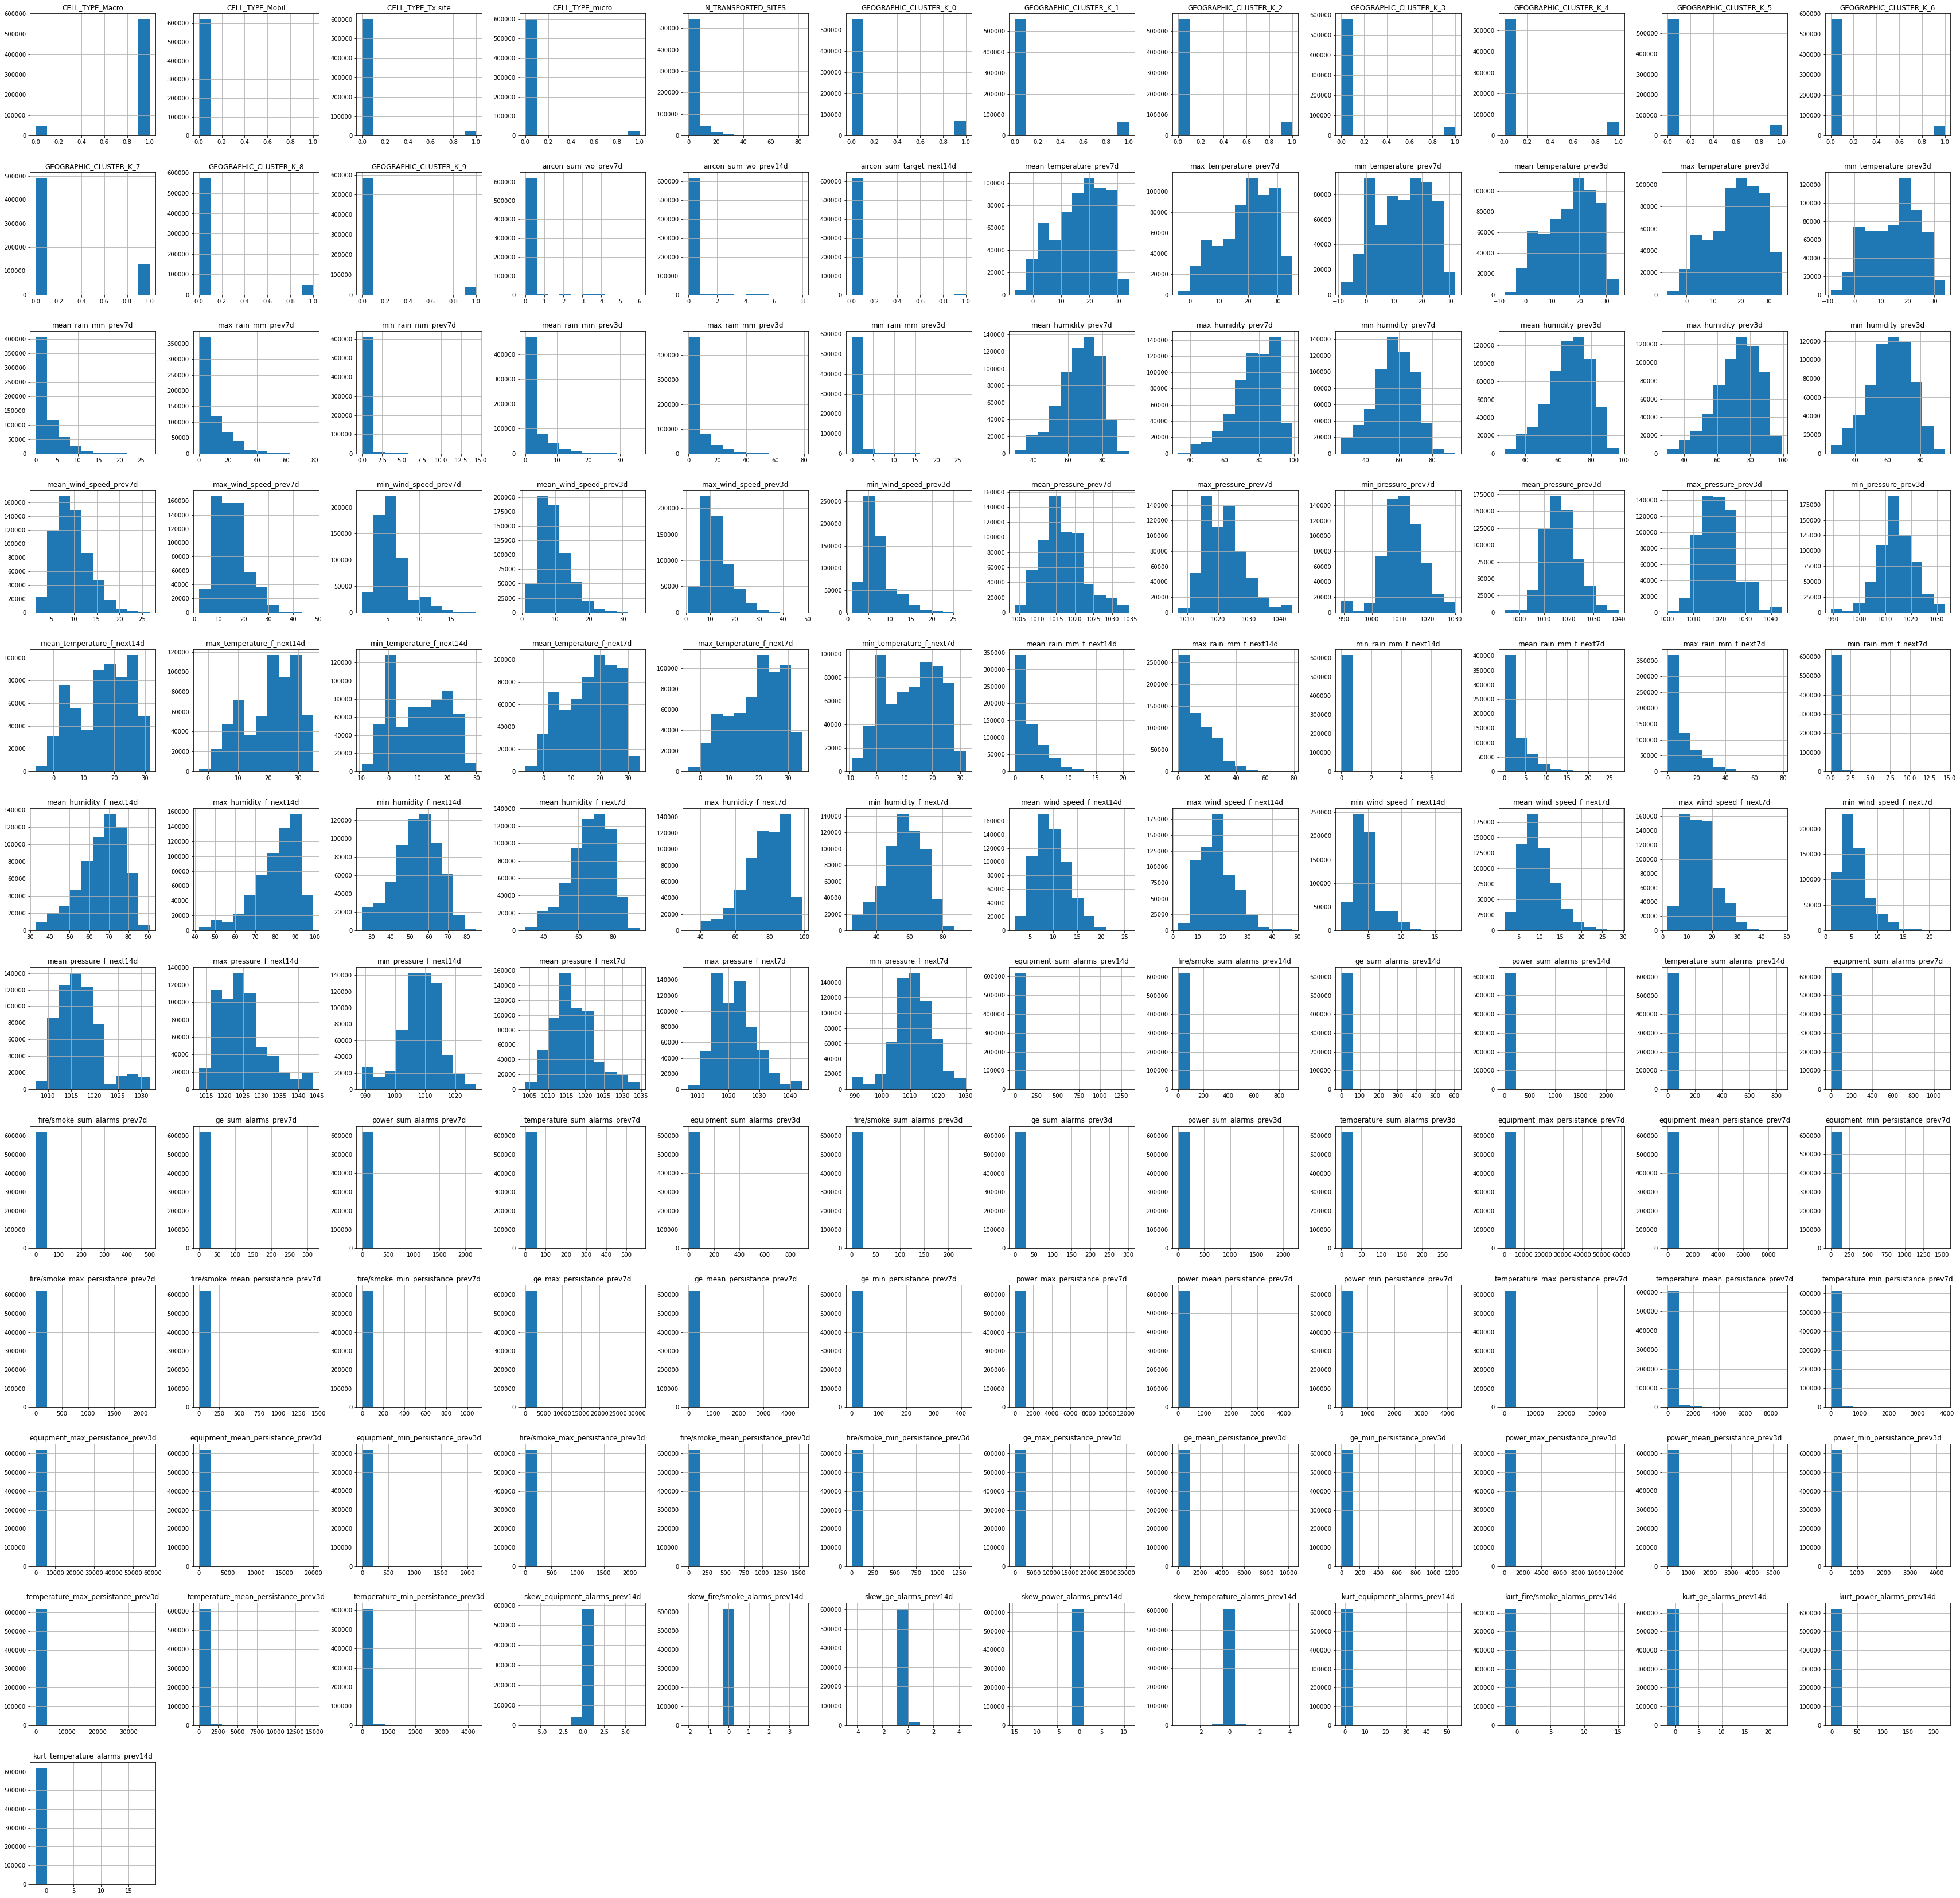

In [29]:
df.hist(figsize = (60,60))

as we can see in the data visualization part we have different types of distributions for our data.

### 3.4 OutLier Analysis

for our analysis as we anticipated before we should Separate our data and group them by their types of Distribution. 

In [65]:
categorical_df = pd.concat([df.loc[: ,'CELL_TYPE_Macro':'CELL_TYPE_micro'], df.loc[: ,'GEOGRAPHIC_CLUSTER_K_0':'GEOGRAPHIC_CLUSTER_K_9']], axis = 1)
aircon_sum_wo_df = df.loc[:, 'aircon_sum_wo_prev7d' : 'aircon_sum_target_next14d']
n_transported_sites = df.loc[:,'N_TRANSPORTED_SITES']

In [67]:
aircon_sum_wo_df.head()

,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,aircon_sum_target_next14d
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,0.0,0.0,0
4,0.0,0.0,0


In [31]:
#Sort alarm's correlated columns 
sorted_sum_alarm_df = df.loc[: , 'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
sorted_sum_alarm_df = sorted_sum_alarm_df.reindex(sorted(sorted_sum_alarm_df.columns, reverse=True), axis=1)## alarms

#Sort persistance's correlated columns
sorted_persistance_df = (df.loc[:, 'equipment_max_persistance_prev7d': 'temperature_min_persistance_prev3d'])
sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=True), axis=1)## persistance


#sort Numerical's  columns 
sorted_numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']## Numerical
sorted_numerical_df = sorted_m3_numerical_values(sorted_numerical_df) 

#Skewness and Kurt
skew_cat_alarms_prev14d = df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d = df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
skwurt = pd.concat([skew_cat_alarms_prev14d,kurt_cat_alarms_prev14d],axis=1)### Skewness and kurt together

all_numerical_df = pd.concat([sorted_numerical_df,sorted_sum_alarm_df,sorted_persistance_df,skwurt],axis=1)

array([[<AxesSubplot:title={'center':'skew_equipment_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_fire/smoke_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_ge_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'skew_power_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'skew_temperature_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_equipment_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'kurt_fire/smoke_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_ge_alarms_prev14d'}>,
        <AxesSubplot:title={'center':'kurt_power_alarms_prev14d'}>],
       [<AxesSubplot:title={'center':'kurt_temperature_alarms_prev14d'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

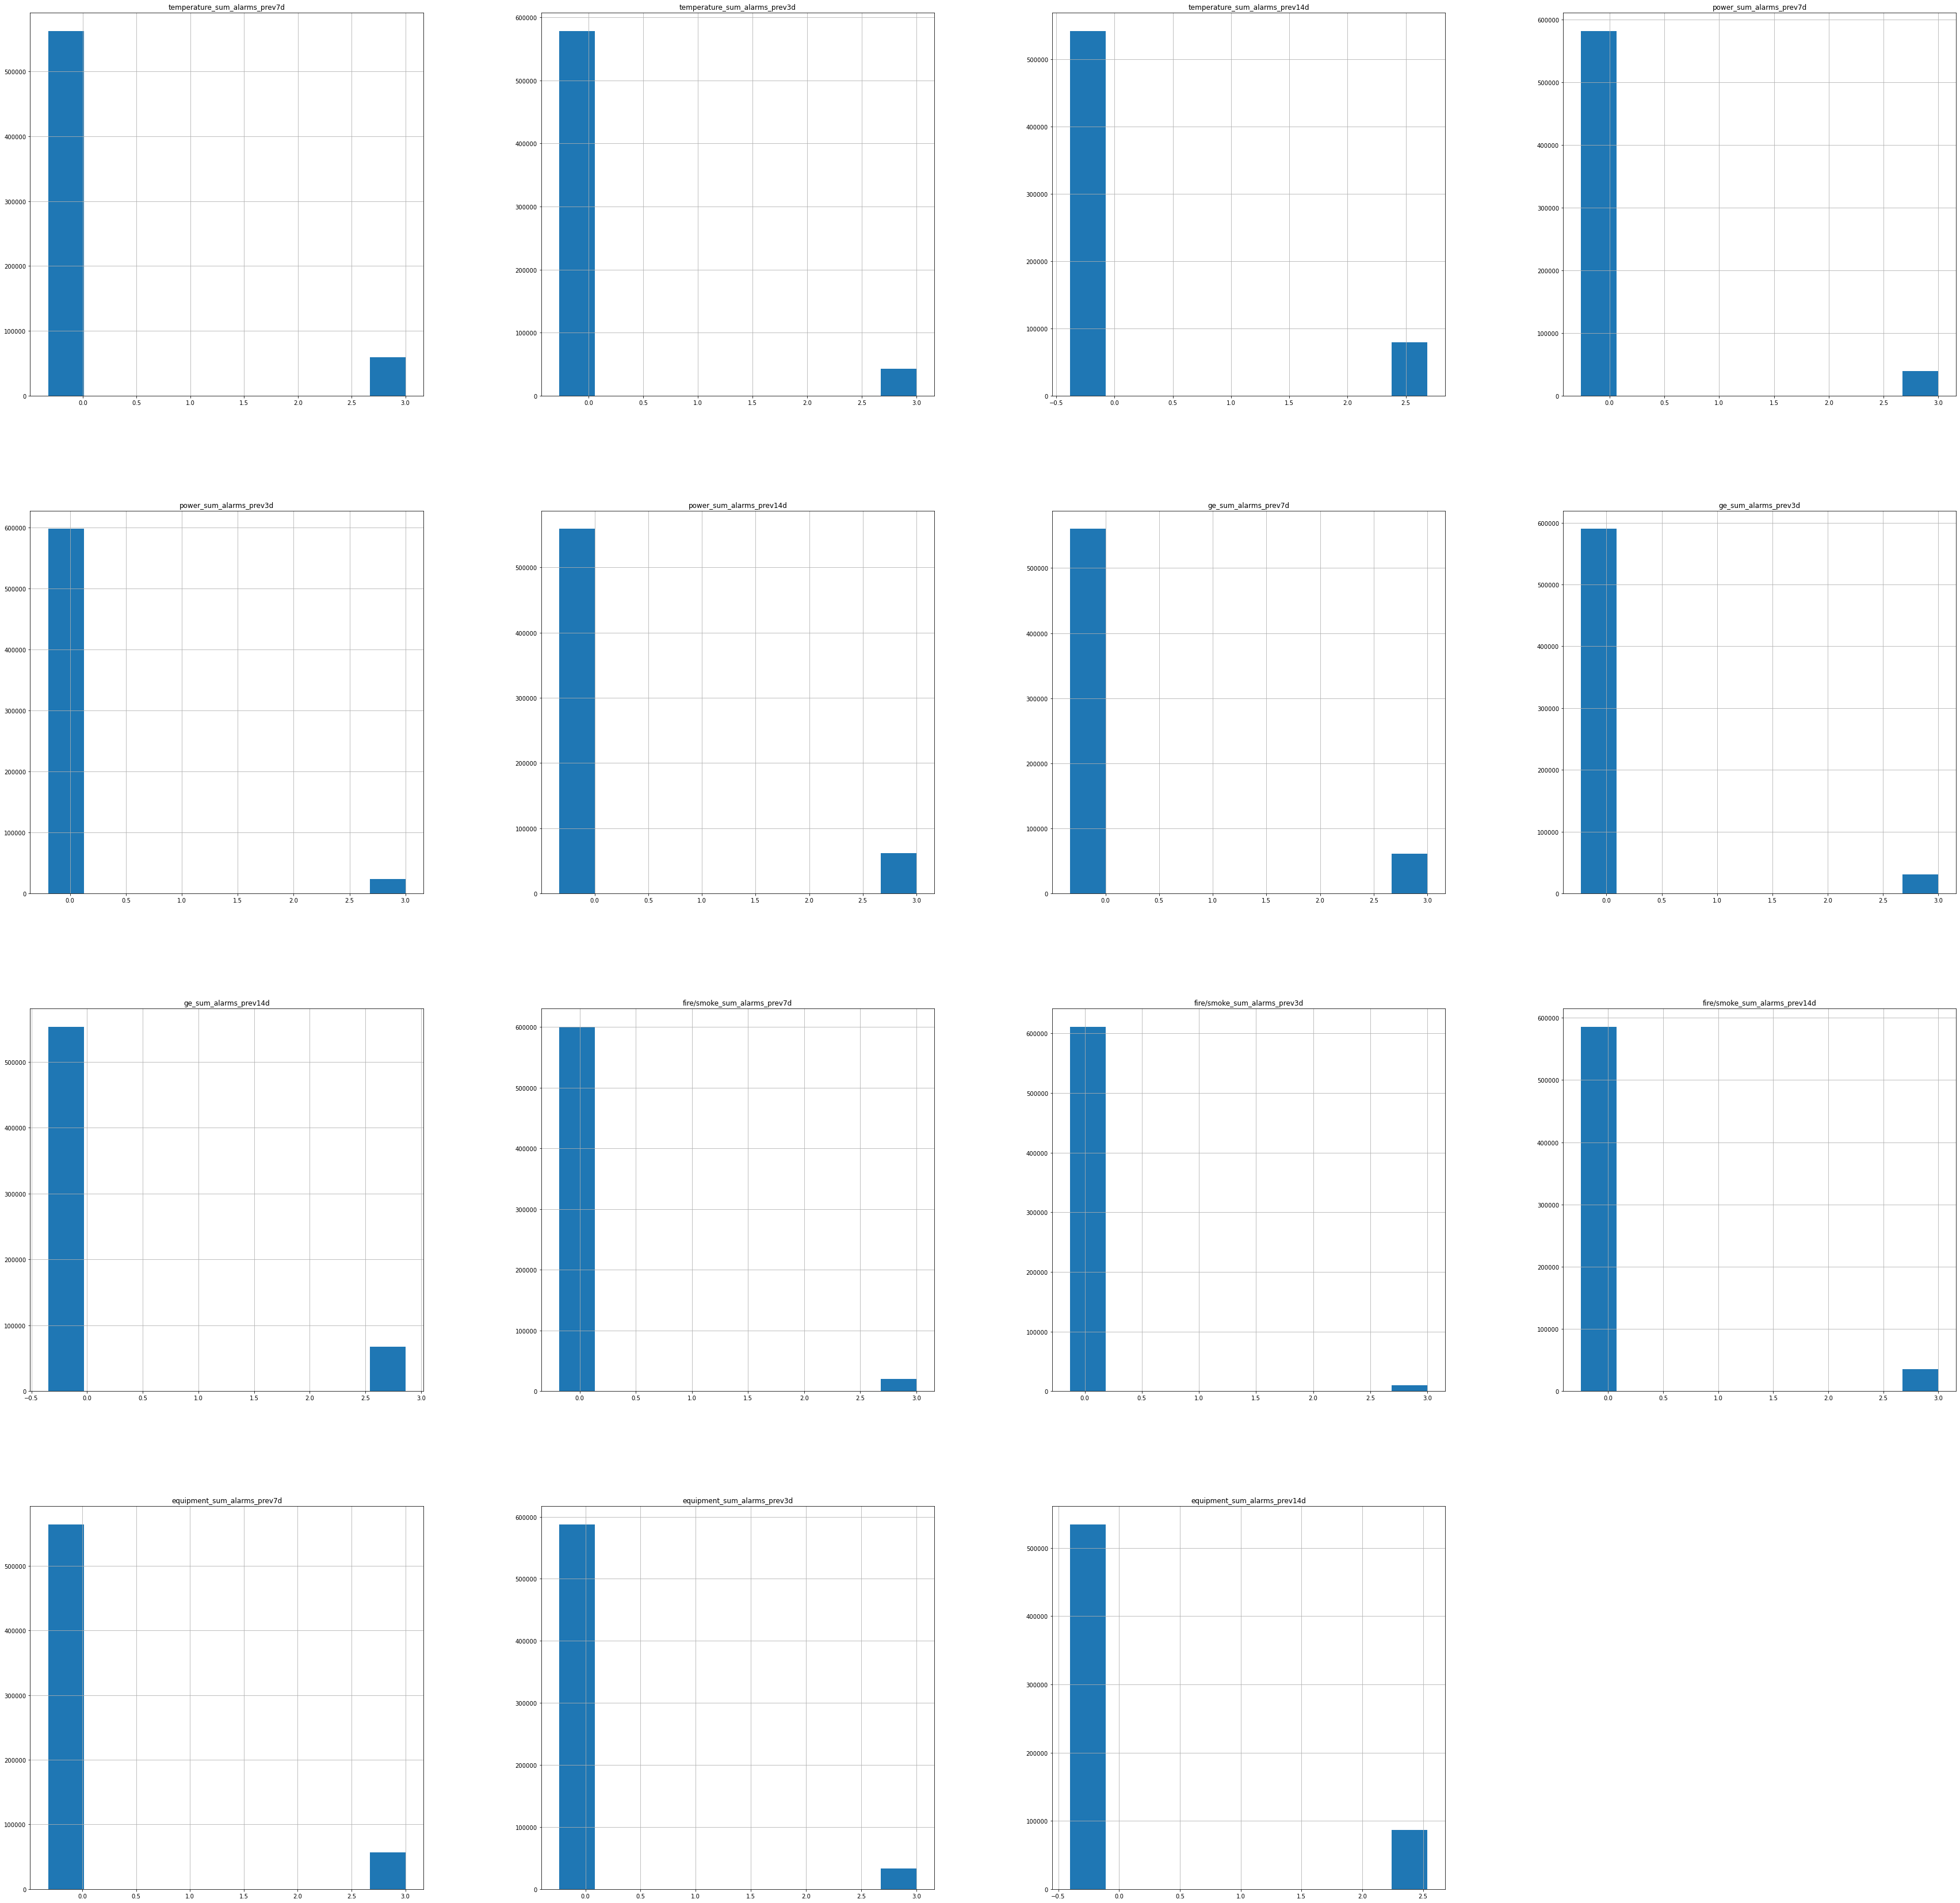

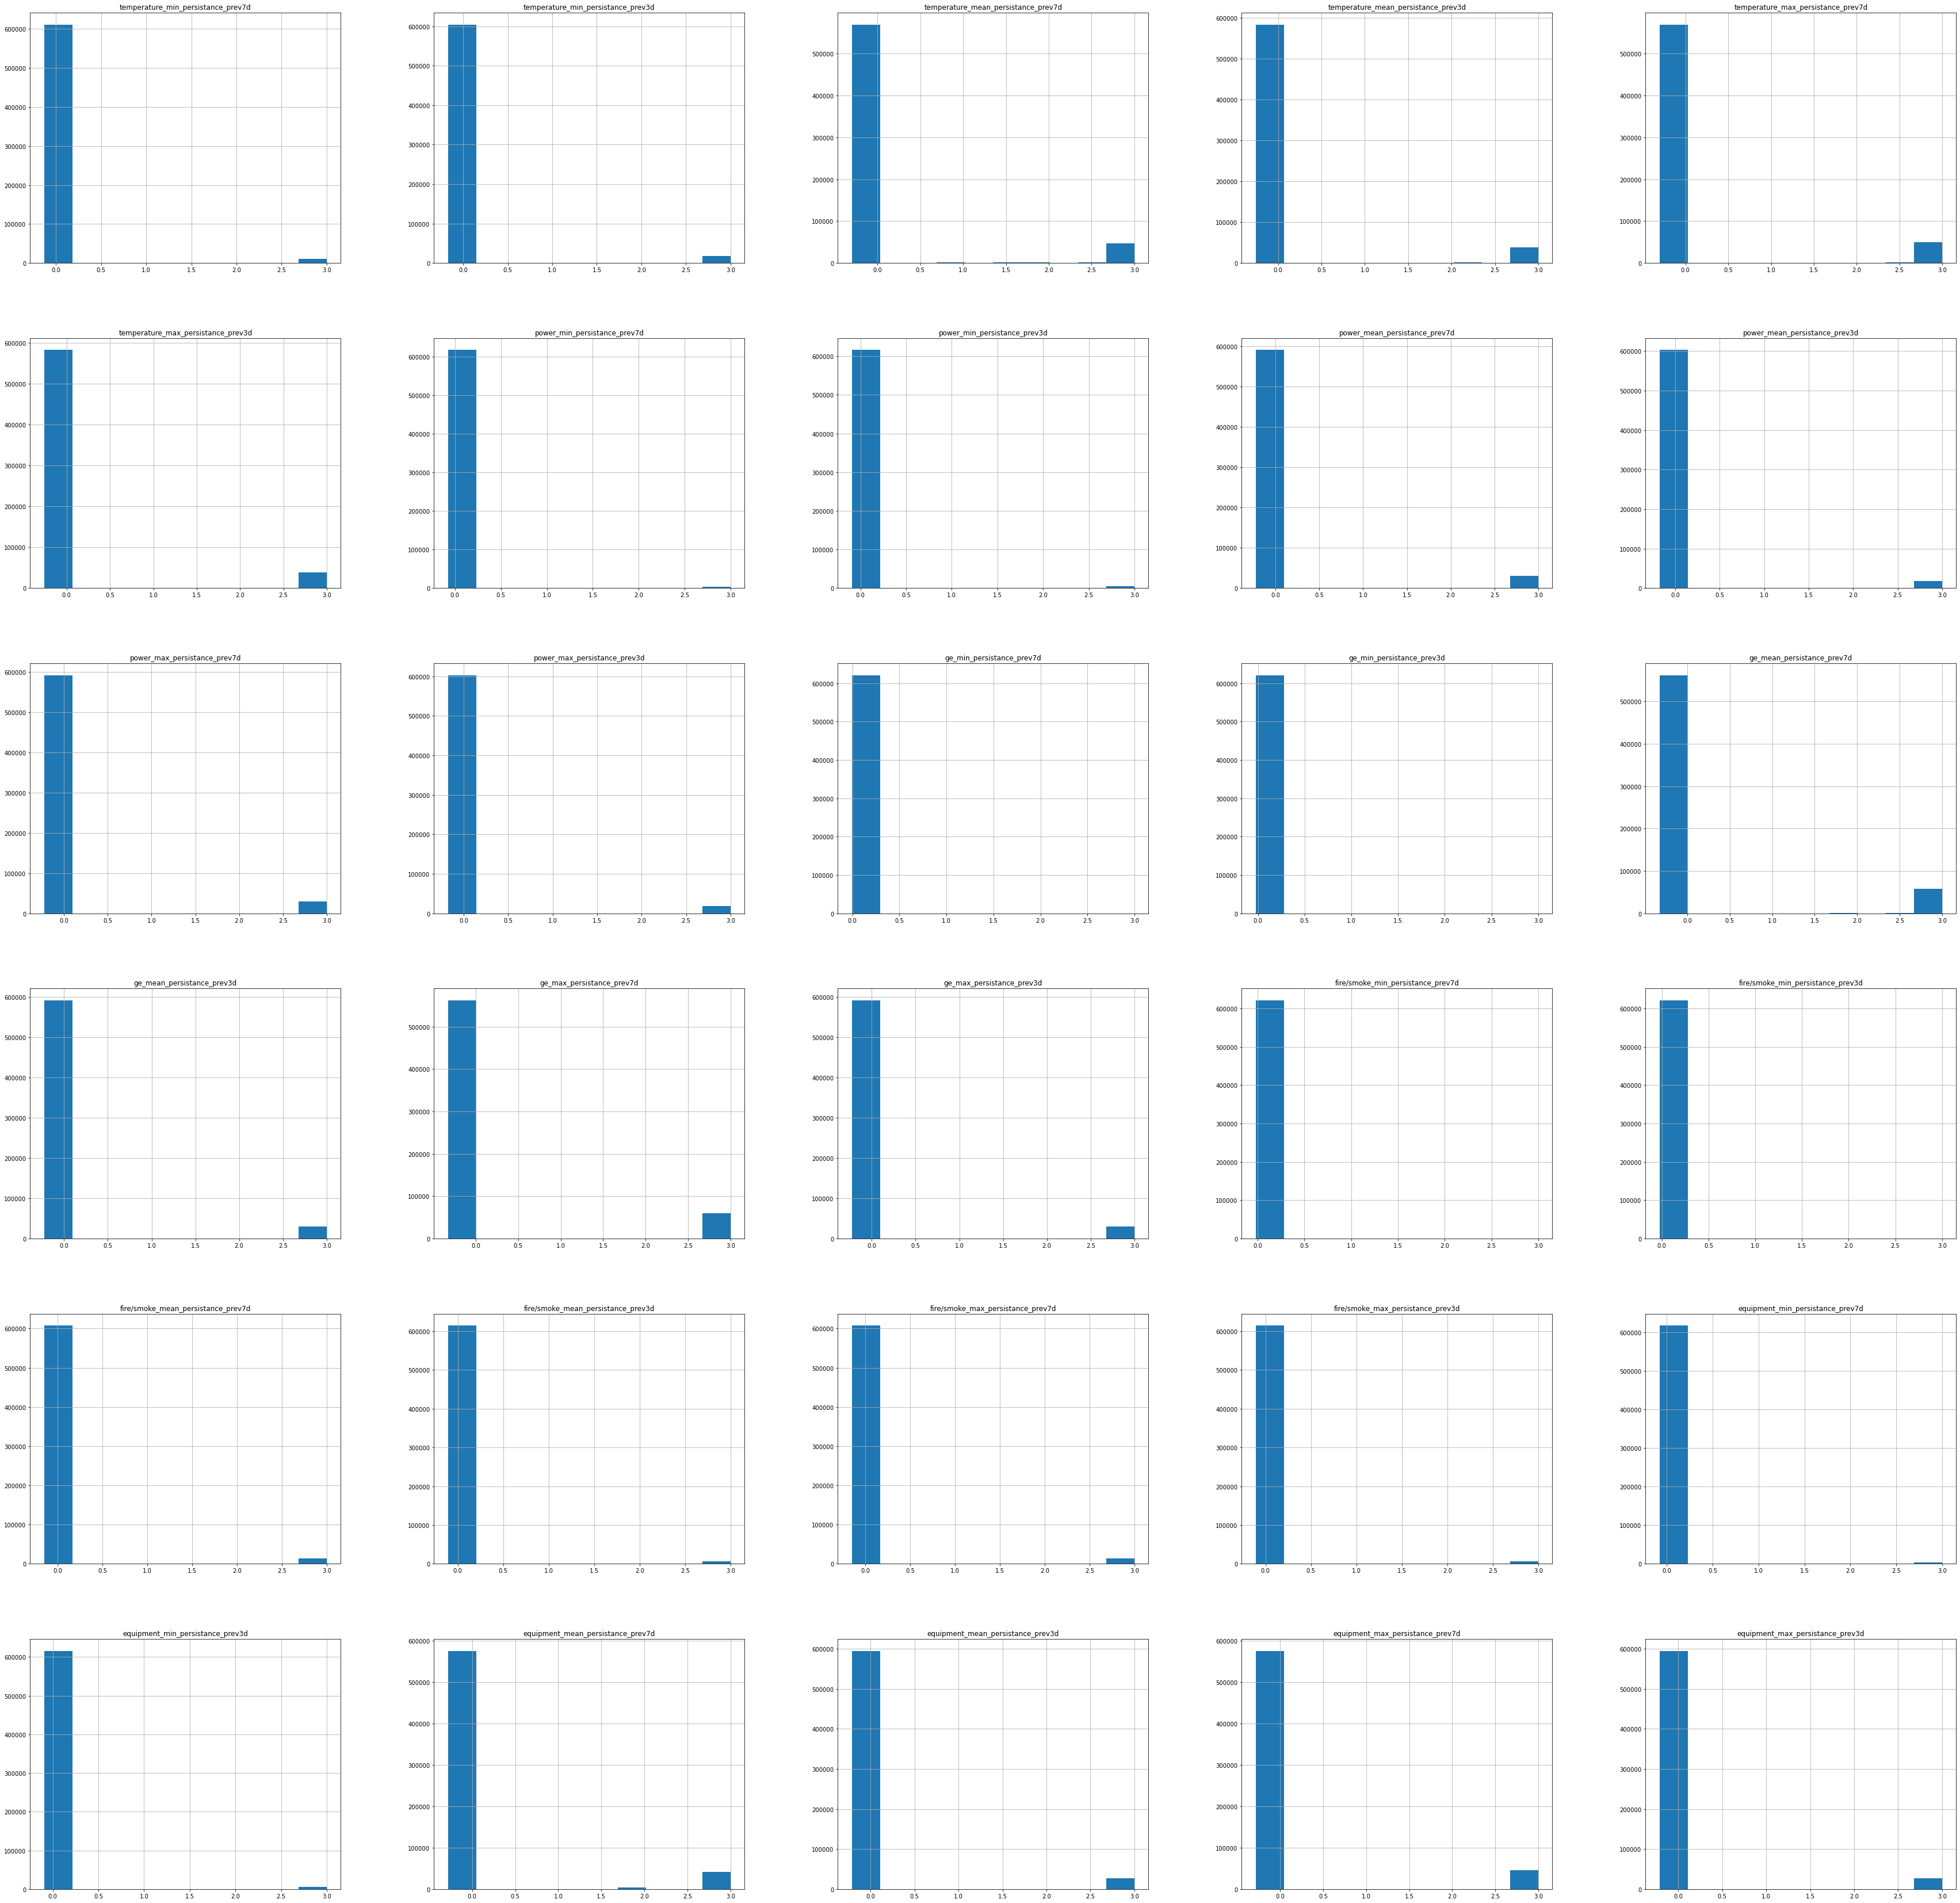

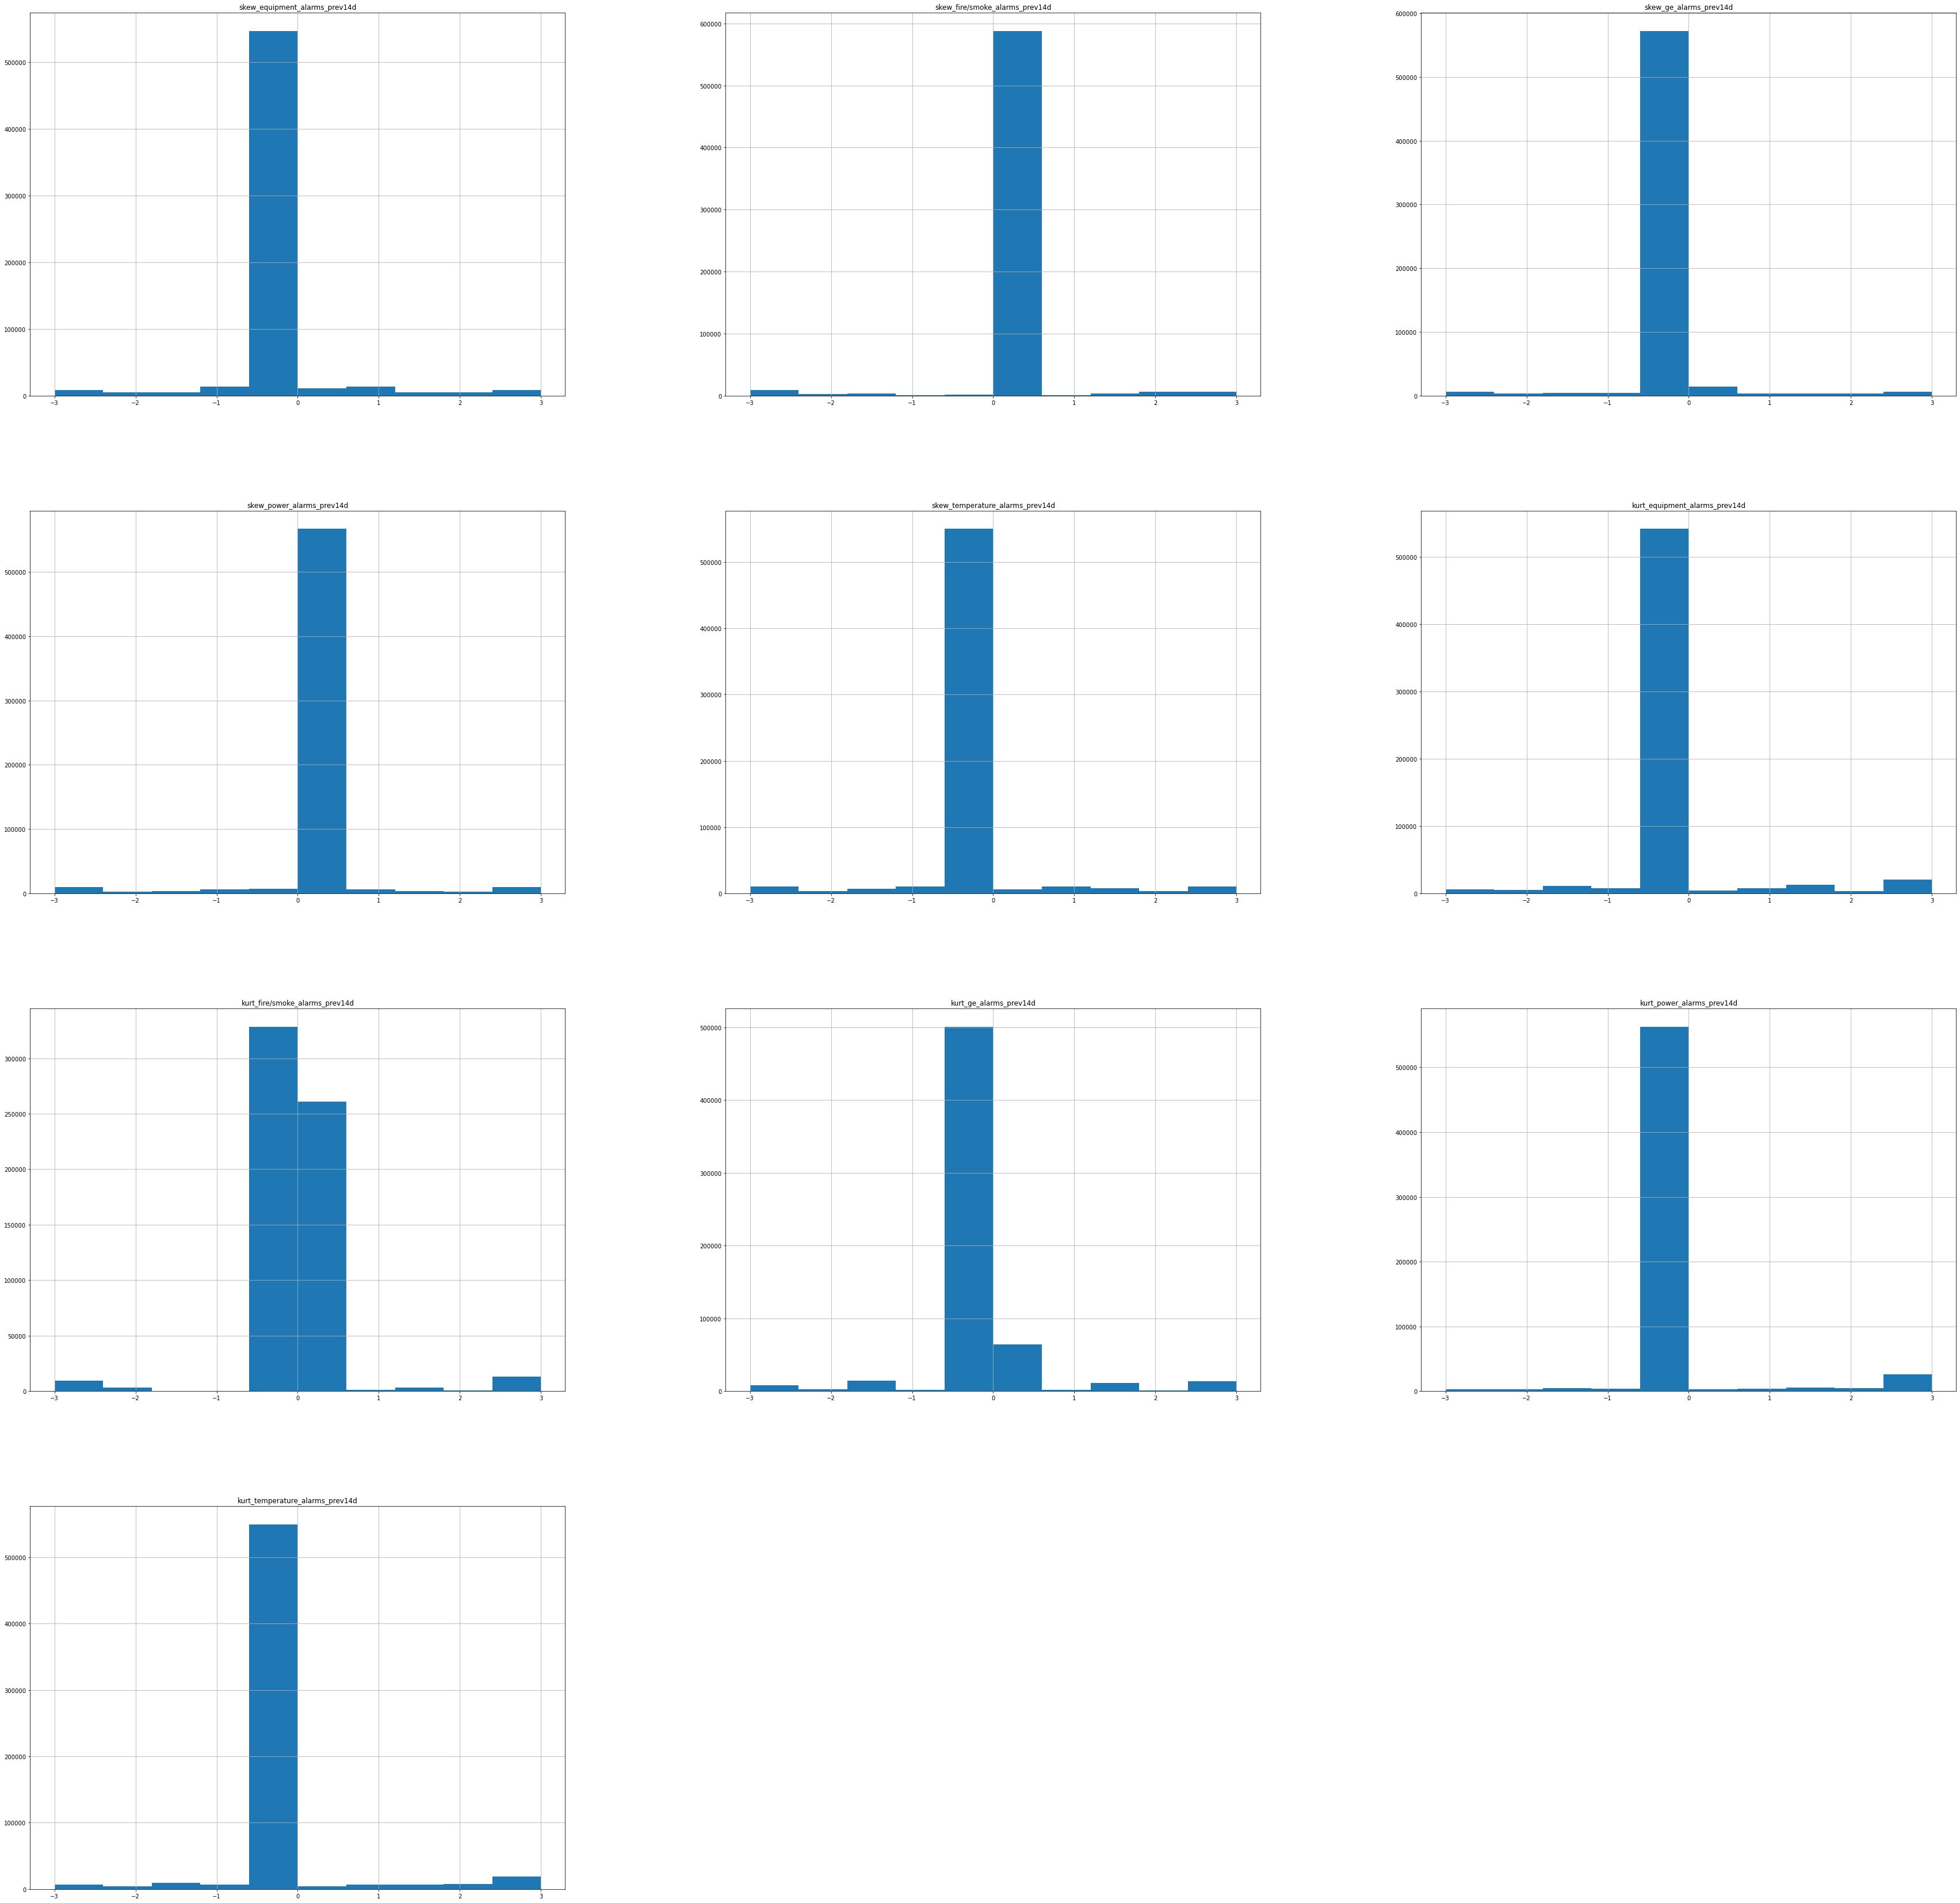

In [107]:
sorted_sum_alarm_df.hist(figsize = (60,60))
sorted_persistance_df.hist(figsize = (60,60))
skwurt.hist(figsize = (60,60))

we can see these types of distribution associated to these group are some how normal so we can use a power transform to make them guassian like

In [32]:
all_numerical_df_np = power_transform(all_numerical_df, method = 'yeo-johnson')

after the transformation we get a numpy array we need to convert it again to a data frame

In [33]:
all_numerical_df = pd.DataFrame(all_numerical_df_np, columns = all_numerical_df.columns)

array([[<AxesSubplot:title={'center':'min_humidity_prev7d'}>,
        <AxesSubplot:title={'center':'min_humidity_prev3d'}>,
        <AxesSubplot:title={'center':'min_humidity_f_next7d'}>,
        <AxesSubplot:title={'center':'min_humidity_f_next14d'}>,
        <AxesSubplot:title={'center':'mean_humidity_prev7d'}>,
        <AxesSubplot:title={'center':'mean_humidity_prev3d'}>,
        <AxesSubplot:title={'center':'mean_humidity_f_next7d'}>,
        <AxesSubplot:title={'center':'mean_humidity_f_next14d'}>,
        <AxesSubplot:title={'center':'max_humidity_prev7d'}>,
        <AxesSubplot:title={'center':'max_humidity_prev3d'}>,
        <AxesSubplot:title={'center':'max_humidity_f_next7d'}>],
       [<AxesSubplot:title={'center':'max_humidity_f_next14d'}>,
        <AxesSubplot:title={'center':'min_pressure_prev7d'}>,
        <AxesSubplot:title={'center':'min_pressure_prev3d'}>,
        <AxesSubplot:title={'center':'min_pressure_f_next7d'}>,
        <AxesSubplot:title={'center':'min_pressu

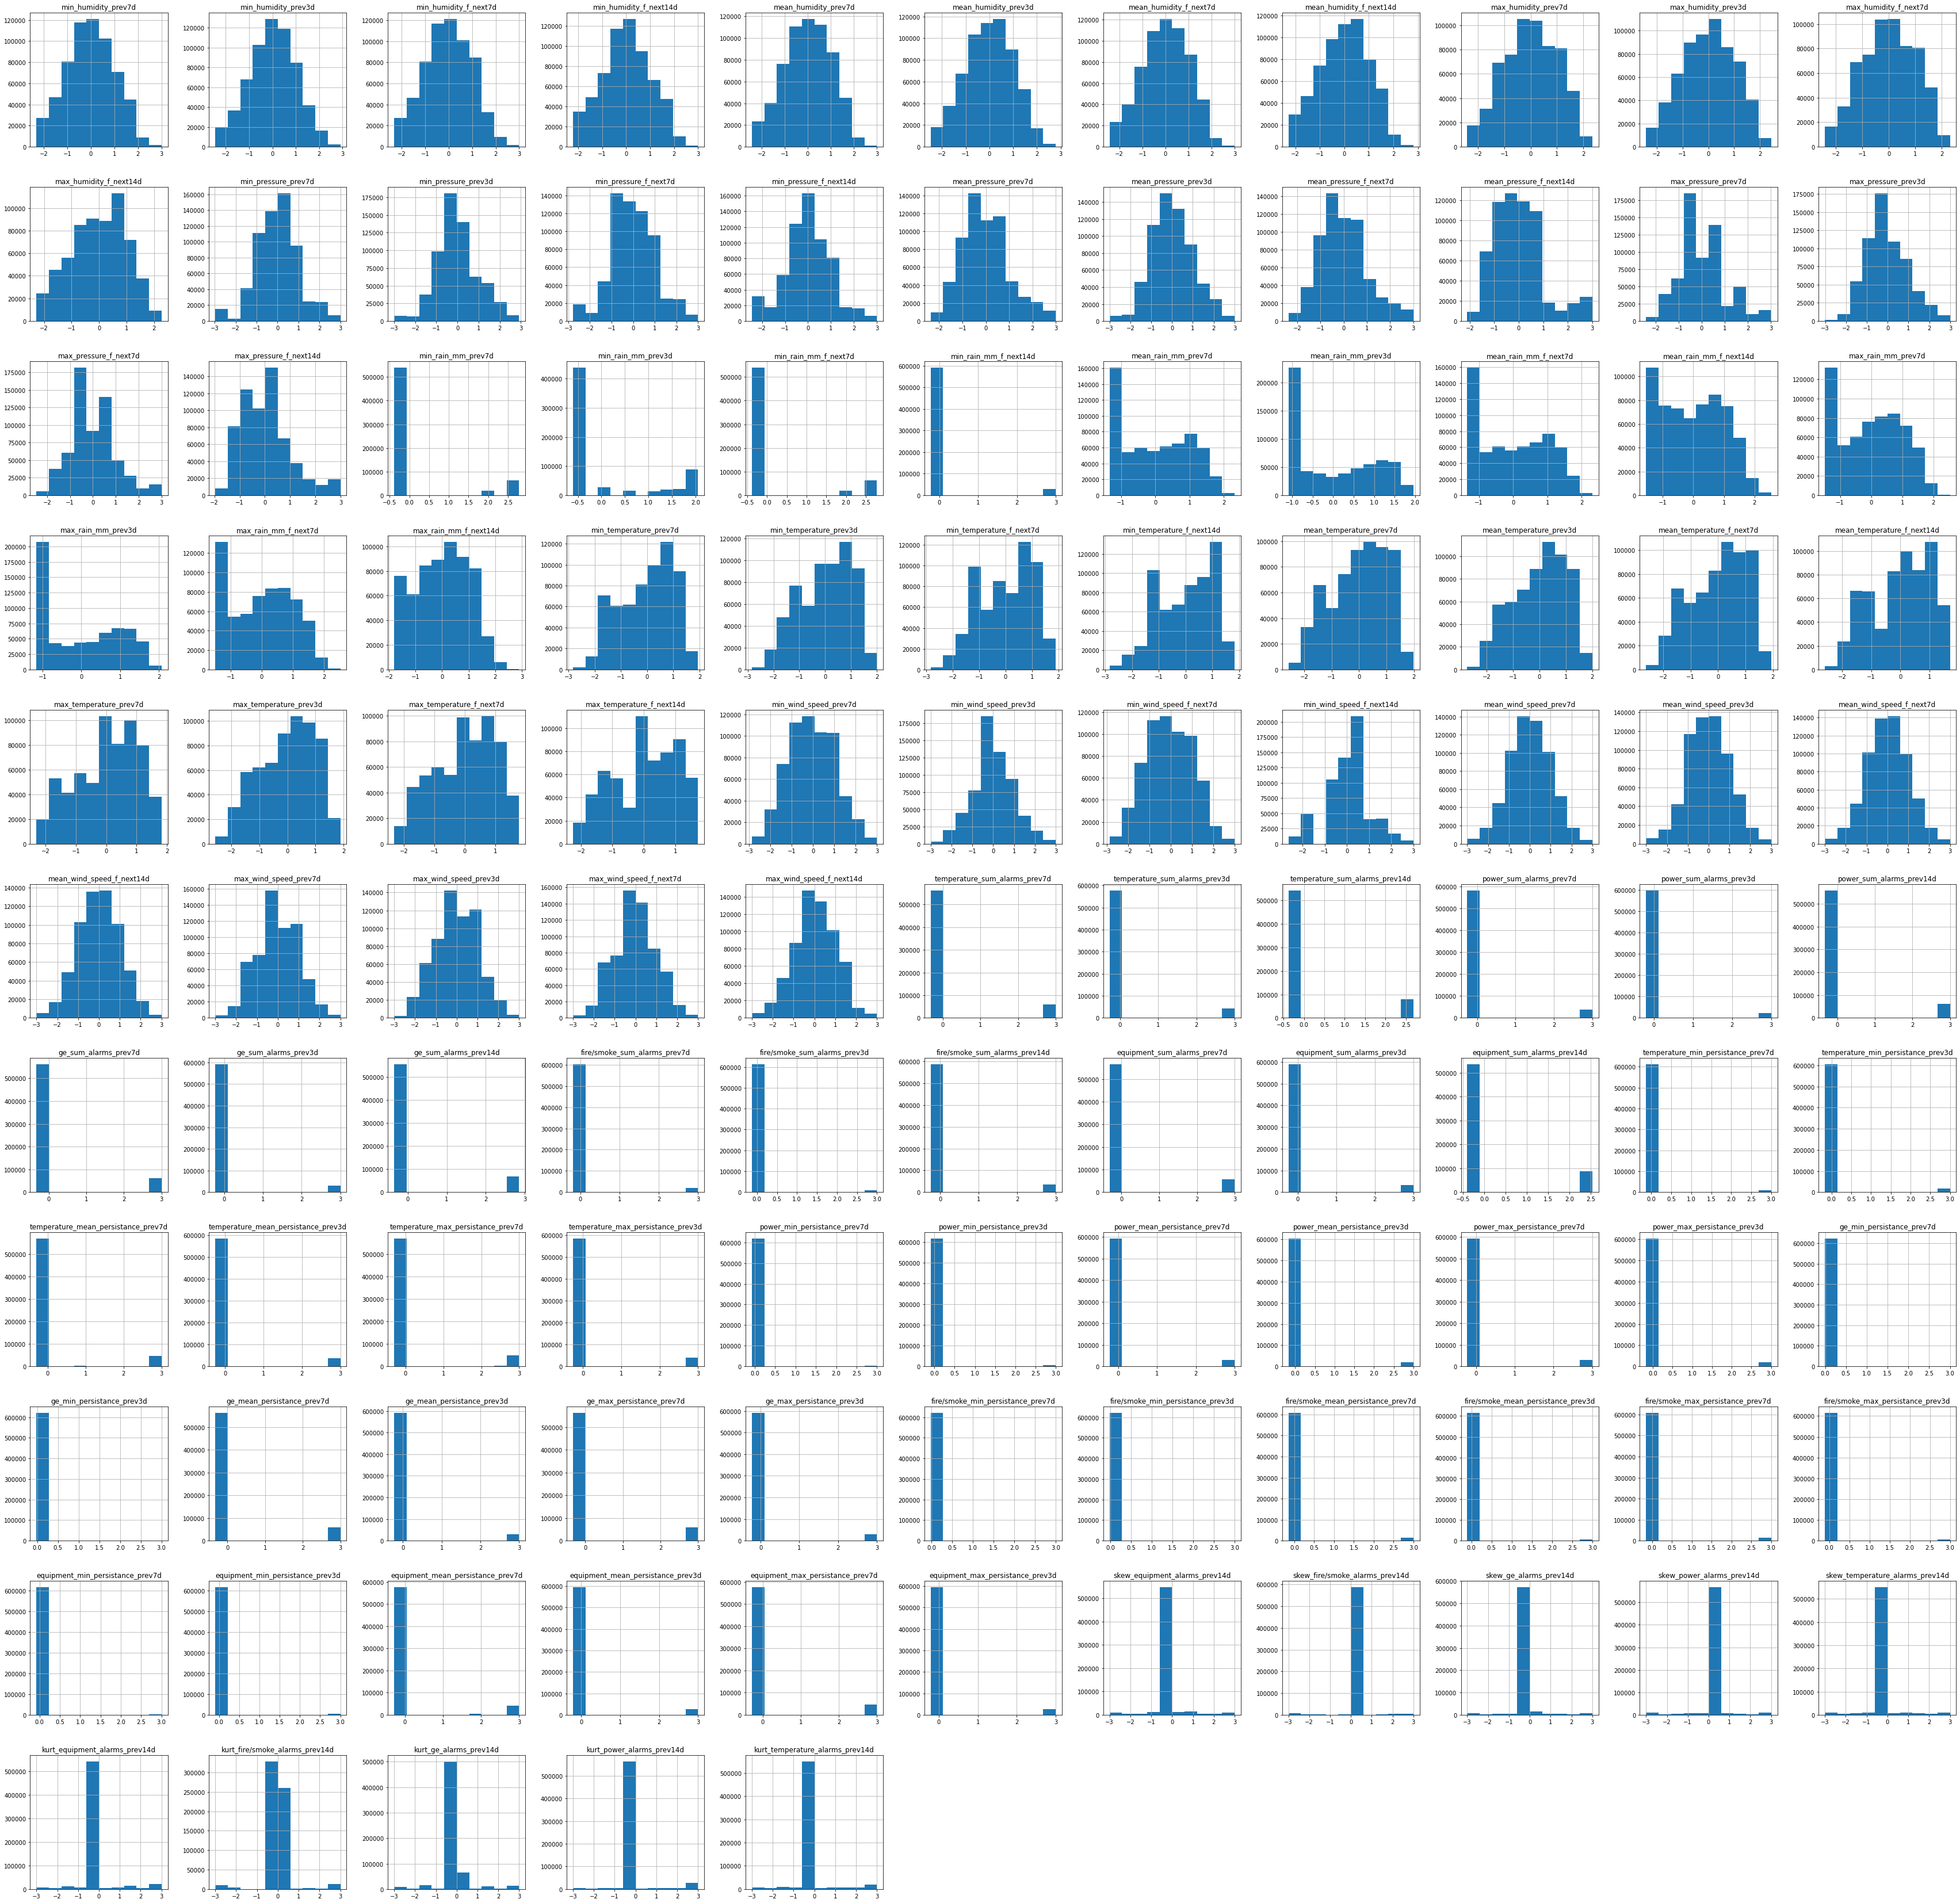

In [106]:
all_numerical_df.hist(figsize=(60,60))

In [34]:
all_numerical_df_mean = all_numerical_df.mean()
all_numerical_df_std = all_numerical_df.std()

In [35]:
all_numerical_df = replace_outliers(all_numerical_df, all_numerical_df_mean, all_numerical_df_std)

In [36]:
print_clean_col(all_numerical_df, all_numerical_df_mean, all_numerical_df_std)

the number of cleaned columns are  115


As you can see almost all outliers are deleted

In [37]:
#Sort alarm's correlated columns 
sorted_sum_alarm_df = all_numerical_df.loc[: , 'temperature_sum_alarms_prev7d':'equipment_sum_alarms_prev14d' ]
# sorted_sum_alarm_df = sorted_sum_alarm_df.reindex(sorted(sorted_sum_alarm_df.columns, reverse=False), axis=1)## alarms

#Sort persistance's correlated columns
sorted_persistance_df = all_numerical_df.loc[:, 'temperature_min_persistance_prev7d': 'equipment_max_persistance_prev3d']
# sorted_persistance_df = sorted_persistance_df.reindex(sorted(sorted_persistance_df.columns, reverse=False), axis=1)## persistance


#sort Numerical's  columns 
sorted_numerical_df = all_numerical_df.loc[: , 'min_humidity_prev7d':'max_wind_speed_f_next14d']## Numerical
# sorted_numerical_df = sorted_m3_numerical_values(sorted_numerical_df, False) 

#Skewness and Kurt
skew_cat_alarms_prev14d = all_numerical_df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d = all_numerical_df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
skwurt = pd.concat([skew_cat_alarms_prev14d,kurt_cat_alarms_prev14d],axis=1)### Skewness and kurt together

### 3.5 Feature Aggregation 

This results in reduction of memory consumption and processing time
Aggregations provide us with a high-level view of the data as the behaviour of groups or aggregates is more stable than individual data objects

Now that we don't have outliers anymore we should try to reduce the number of features that we have.

***Saeid inja tozihat bnvis k chikara kardi***

In [38]:
# copy
snv = sorted_numerical_df.copy()
index = 0
counter = len(snv.columns)

#create an empty celane_df_ to save pruned numerical feature
pruned_num_df = snv.iloc[0:0, 0:0]

while(index < counter):
    i = 0
    cl = snv.iloc[:, index:index+4]
    pruned_num_df['ind_'+snv.columns[index]] = ((cl.iloc[:,i]/7) + (cl.iloc[:,i+1]/3) + (cl.iloc[:, i+2]/7) + (cl.iloc[:, i+3]/14))* 3/2

    index+=4

pruned_num_df

,ind_min_humidity_prev7d,ind_mean_humidity_prev7d,ind_max_humidity_prev7d,ind_min_pressure_prev7d,ind_mean_pressure_prev7d,ind_max_pressure_prev7d,ind_min_rain_mm_prev7d,ind_mean_rain_mm_prev7d,ind_max_rain_mm_prev7d,ind_min_temperature_prev7d,ind_mean_temperature_prev7d,ind_max_temperature_prev7d,ind_min_wind_speed_prev7d,ind_mean_wind_speed_prev7d,ind_max_wind_speed_prev7d
0,-0.220659,0.358461,0.665066,-0.832479,-0.751274,-0.726458,1.299733,0.818311,0.919482,-0.656787,-0.739345,-0.745886,0.089649,0.357917,0.225234
1,0.400402,0.597364,0.665066,-0.640811,-0.795705,-0.819418,1.299733,0.891479,0.777982,-0.586317,-0.650417,-0.563831,0.089649,0.332584,0.225234
2,0.524114,0.764865,1.150878,-0.488671,-0.734575,-0.809666,1.299733,1.268330,1.166420,-0.586317,-0.632993,-0.447408,0.089649,0.669113,0.472066
3,0.524114,0.864552,1.150878,-0.455128,-0.498590,-0.535324,1.507274,1.254544,1.166420,-0.663915,-0.721805,-0.422117,0.967687,0.896722,0.472066
4,1.001986,1.148082,1.150878,-0.329232,-0.234741,-0.202198,2.170650,1.280906,1.166420,-0.900717,-0.906846,-0.780773,0.672672,0.786176,0.437828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621295,0.690415,1.261952,1.534255,-0.733348,-0.270823,0.397244,0.761937,1.354924,1.410044,-1.127025,-1.274460,-1.302109,0.327442,0.851981,1.278303
621296,0.690415,1.094143,0.993528,-0.733348,-0.303415,0.334889,0.761937,1.078745,1.067819,-1.239974,-1.306444,-1.302109,0.821874,0.981126,1.278303
621297,0.427343,0.895402,0.993528,-0.733348,-0.174612,0.398550,0.748071,1.082234,1.067819,-1.214275,-1.362868,-1.354800,0.470570,1.025419,1.278303
621298,0.587985,0.967440,1.133772,-0.370556,0.038162,0.332982,-0.491789,0.691589,0.764286,-1.214275,-1.298628,-1.165340,0.560505,0.988198,1.278303


after pruning we get the correlation between variables here we see that we can remove the very cirrelated features

*just as an idea between the highly correlated features we can kepp the one with the highest covariance*

<AxesSubplot:>

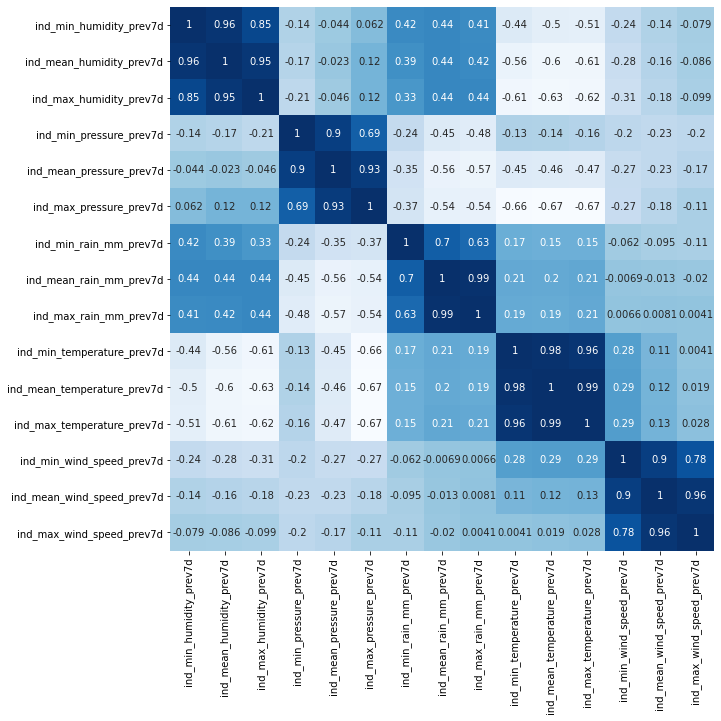

In [39]:
pruned_num_cov=pd.concat([pruned_num_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(pruned_num_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.85

In [40]:
pruned_num_df = compare_corr_values(pruned_num_cov, pruned_num_df)

<AxesSubplot:>

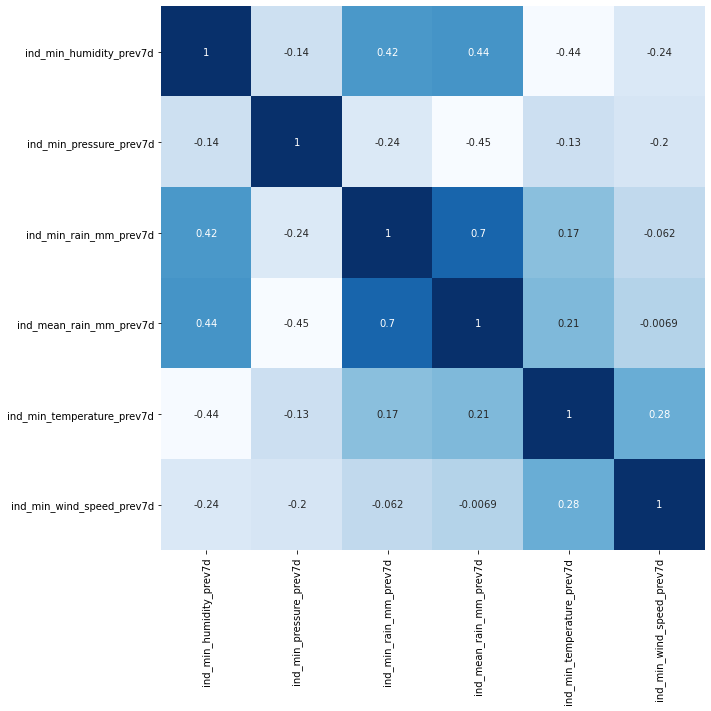

In [41]:
pruned_num_df_cov=pd.concat([pruned_num_df], axis=1).corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(pruned_num_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In this step we are going to prune the cat_m3_persistance_prevXd data and reduce the features. To do this we assing a weight to each Xdays (3day = 1/3, 7day = 1/7, 14day = 1/14

In [42]:
spd = sorted_persistance_df
index = 0
counter = len(spd.columns)

#create an empty celane_df_ to save pruned persistance feature
pruned_persistance_df = spd.iloc[0:0, 0:0]

while(index < counter):
    i = 0
    cl = spd.iloc[:, index:index+2]
    pruned_persistance_df['ind_'+spd.columns[index]] = ((cl.iloc[:,i]/7) + (cl.iloc[:,i+1]/3)) * 2.1

    index+=2

pruned_persistance_df

,ind_temperature_min_persistance_prev7d,ind_temperature_mean_persistance_prev7d,ind_temperature_max_persistance_prev7d,ind_power_min_persistance_prev7d,ind_power_mean_persistance_prev7d,ind_power_max_persistance_prev7d,ind_ge_min_persistance_prev7d,ind_ge_mean_persistance_prev7d,ind_ge_max_persistance_prev7d,ind_fire/smoke_min_persistance_prev7d,ind_fire/smoke_mean_persistance_prev7d,ind_fire/smoke_max_persistance_prev7d,ind_equipment_min_persistance_prev7d,ind_equipment_mean_persistance_prev7d,ind_equipment_max_persistance_prev7d
0,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951
1,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951
2,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951
3,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951
4,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621295,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951
621296,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951
621297,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951
621298,-0.156666,-0.268942,-0.270952,-0.086305,-0.189382,-0.189629,-0.016525,-0.255575,-0.255669,-0.021341,-0.118427,-0.118427,-0.088116,-0.230962,-0.231951


<AxesSubplot:>

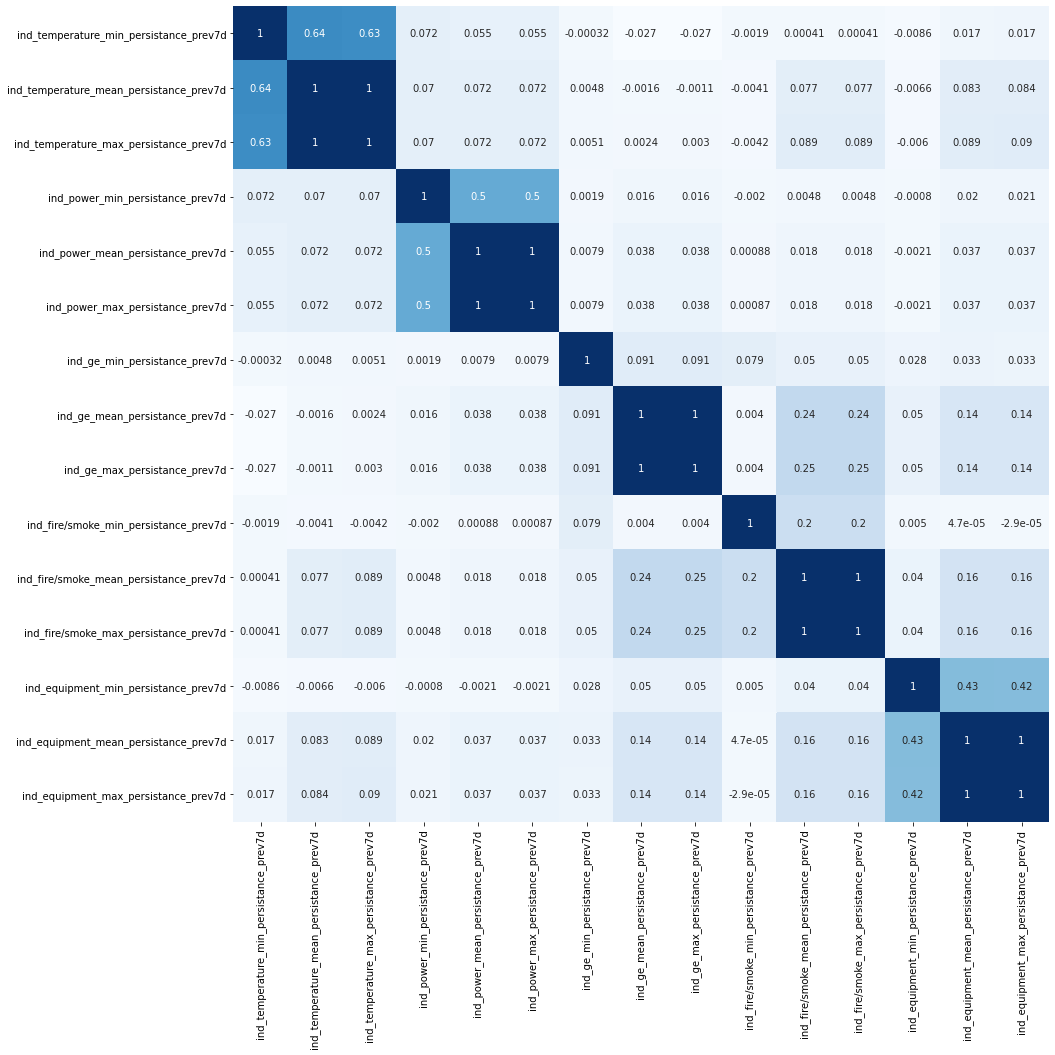

In [43]:
pruned_persistance_cov=pd.concat([pruned_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (15,15))
sns.heatmap(pruned_persistance_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.85

In [44]:
pruned_persistance_df = compare_corr_values(pruned_persistance_cov, pruned_persistance_df)

<AxesSubplot:>

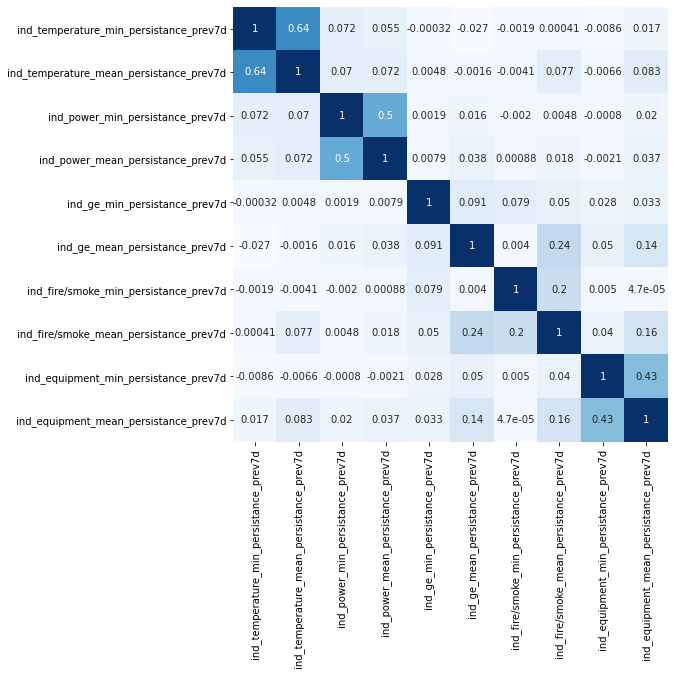

In [45]:
pruned_persistance_cov=pd.concat([pruned_persistance_df], axis=1).corr(method='pearson')
plt.figure(figsize = (8,8))
sns.heatmap(pruned_persistance_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [46]:
concat = pd.concat([pruned_persistance_df,pruned_num_df], axis=1)

For aggregating the number of alarm associated to the pre14 prev7 prev3 days we need to use the kurt and skew measures simce they are not normaliaze we need to normalize them

In [47]:
normalized_kurt_cat_alarms_prev14d = normalizer_df(kurt_cat_alarms_prev14d,True,False)
normalized_skew_cat_alarms_prev14d = normalizer_df(skew_cat_alarms_prev14d,True,False)

<AxesSubplot:>

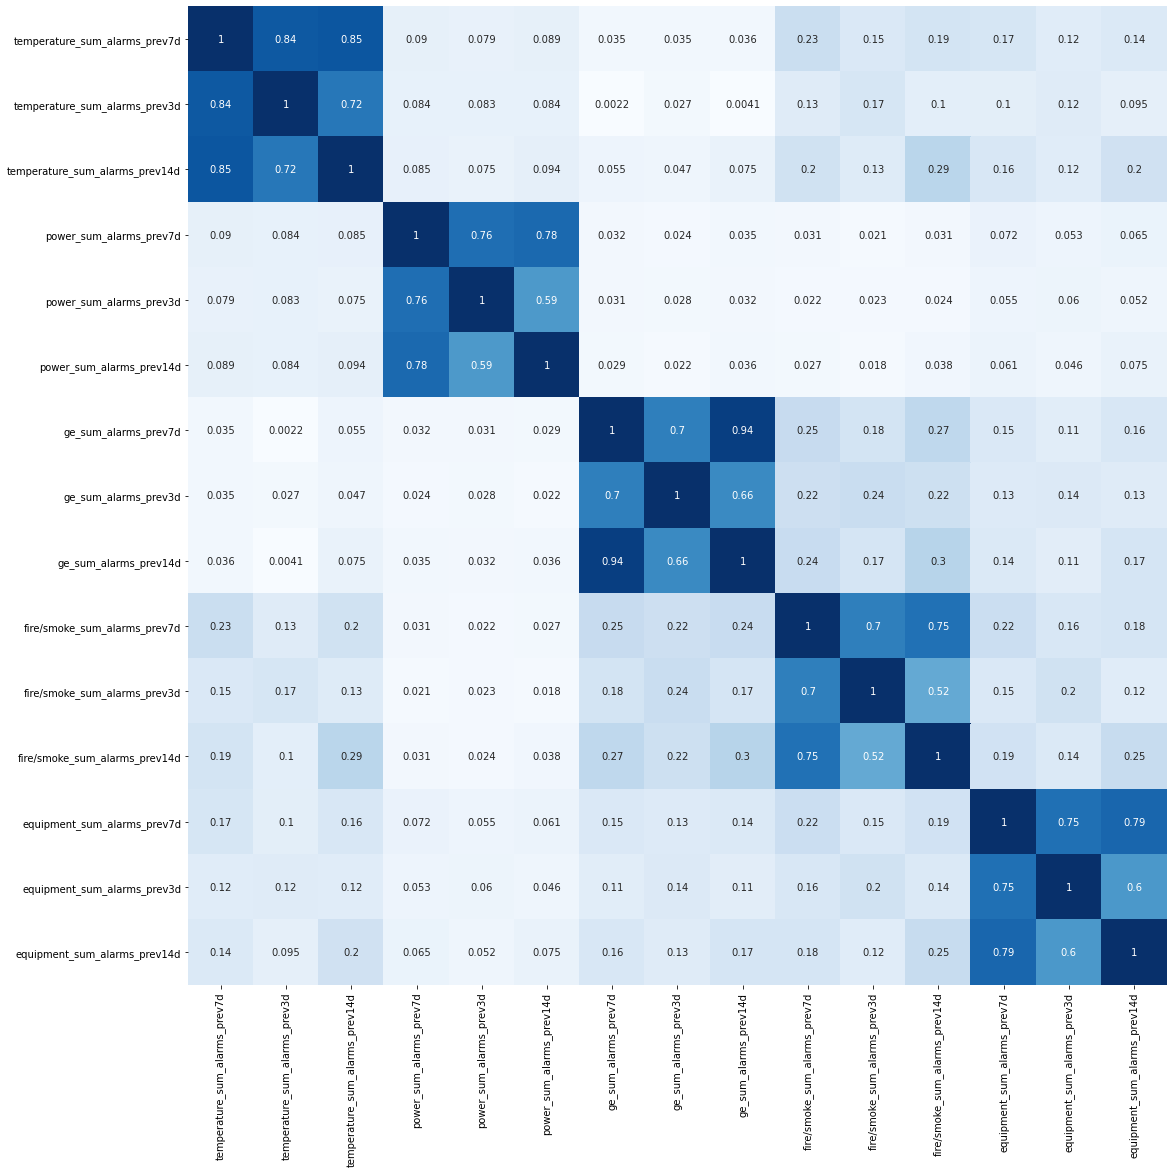

In [48]:
sorted_sum_alarm_df_cov=pd.concat([sorted_sum_alarm_df], axis=1).corr(method='pearson')
plt.figure(figsize = (18,18))
sns.heatmap(sorted_sum_alarm_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

as we can see some of the features are highly correlated to each other so using skurt and skew we want to combine them together

In [49]:
sorted_sum_alarm_df = sorted_sum_alarm_df.copy()
sorted_sum_alarm_df_agg = sorted_sum_alarm_df.iloc[0:0, 0:0]
for i in range(len(normalized_kurt_cat_alarms_prev14d.columns)):

    lentype = len(sorted_sum_alarm_df.columns)-i*3
    kurt = normalized_kurt_cat_alarms_prev14d.iloc[:,i]
    skew = normalized_skew_cat_alarms_prev14d.iloc[:,i]
    name = sorted_sum_alarm_df.iloc[:,lentype-2].name
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= -1)) & 
                            ((skew <= -0.2) | (skew >= -1)), 
                            'aggregated_'+name] = (14*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        7*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+7)
    sorted_sum_alarm_df_agg.loc[((skew <= -0.2) | (skew >= 0.2)), 
                            'aggregated_'+name] = (7*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        7*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+7+7)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= 1)) & 
                            ((skew <= -0.2) | (skew >= -1)), 
                            'aggregated_'+name] = (14*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        1*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        2*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+2+1)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= -1)) & 
                            ((skew <= 0.2) | (skew >= 1)), 
                            'aggregated_'+name] = (3*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+3)
    sorted_sum_alarm_df_agg.loc[((kurt <= 0 )| (kurt >= 1)) & 
                            ((skew <= 0.2) | (skew >= 1)), 
                            'aggregated_'+name] = (2*sorted_sum_alarm_df.iloc[:,lentype-2] + 
                                                        14*sorted_sum_alarm_df.iloc[:,lentype-3] + 
                                                        3*sorted_sum_alarm_df.iloc[:,lentype-4])/(14+3+2)
    

<AxesSubplot:>

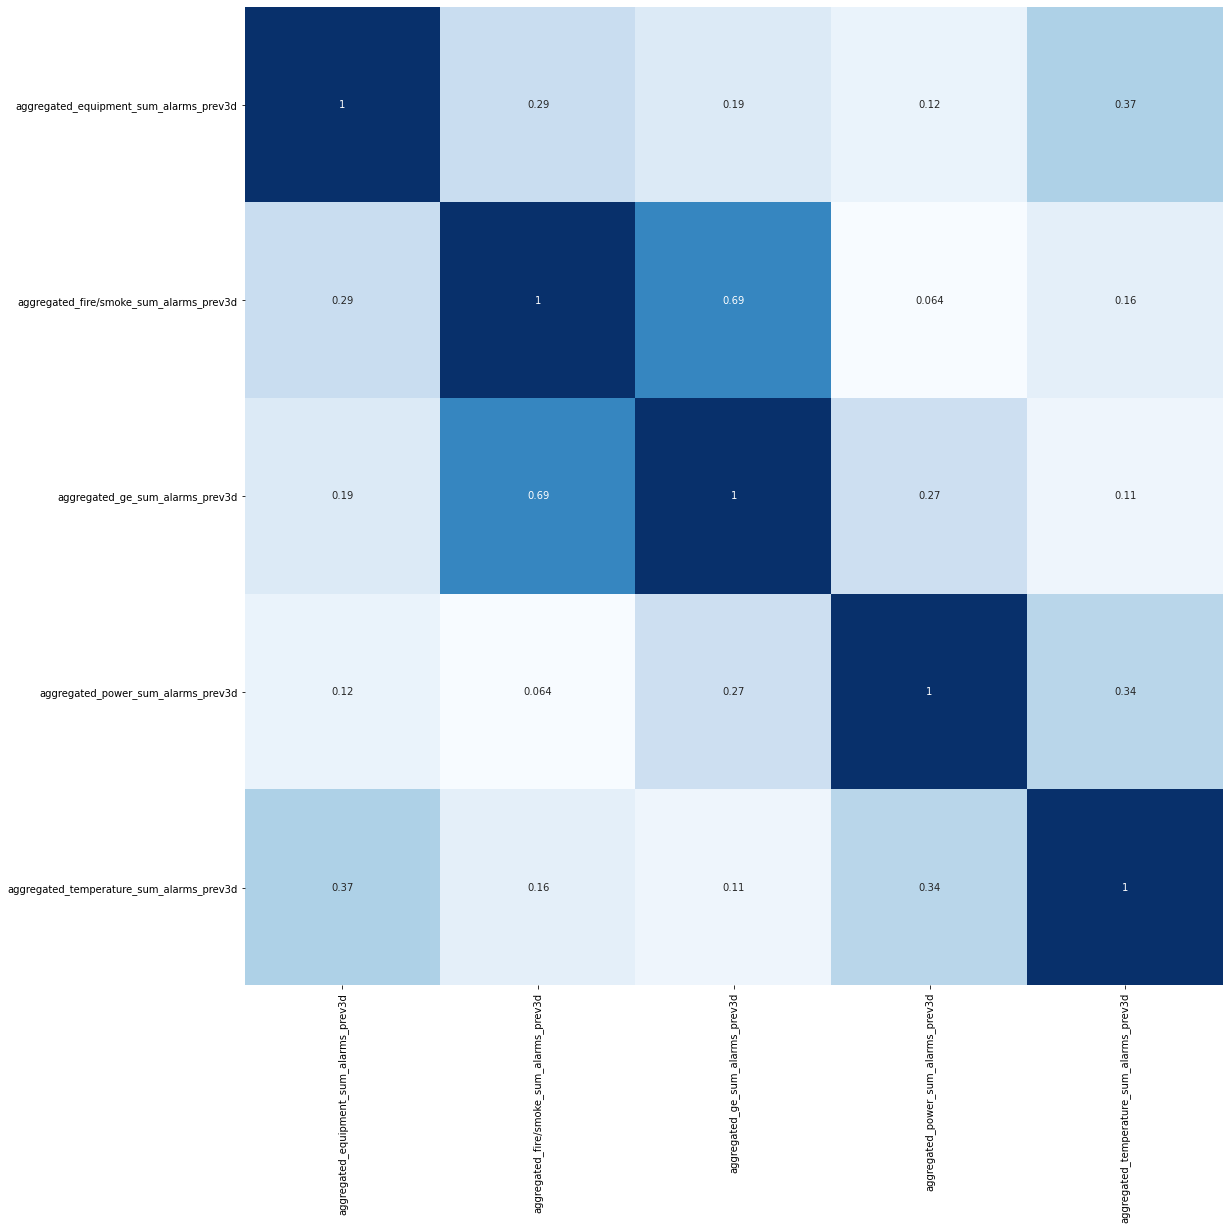

In [50]:
sorted_sum_alarm_df_cov=pd.concat([sorted_sum_alarm_df_agg], axis=1).corr(method='pearson')
plt.figure(figsize = (18,18))
sns.heatmap(sorted_sum_alarm_df_cov,square=True,annot=True,cmap="Blues",cbar=False,xticklabels=True, yticklabels=True)

In [68]:
concat_df = pd.concat([categorical_df, aircon_sum_wo_df, n_transported_sites, concat, sorted_sum_alarm_df_agg, skwurt], axis = 1)

In [69]:
concat_df.describe()

,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_Tx site,CELL_TYPE_micro,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,...,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
count,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,...,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000,621300.000000
mean,0.921777,0.000966,0.033317,0.036697,0.112023,0.102366,0.102366,0.069532,0.107195,0.082086,...,-0.000416,0.002946,-0.000325,-0.000174,-0.001253,-0.004435,-0.014075,-0.006487,-0.010312,0.002436
std,0.268523,0.031061,0.179464,0.188018,0.315395,0.303129,0.303129,0.254356,0.309361,0.274496,...,0.619109,0.533566,0.515660,0.607390,0.645356,0.740936,0.608431,0.659992,0.733647,0.719276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.000002,-3.000002,-3.000002,-3.000002,-3.000002,-3.000002,-3.000002,-3.000002,-3.000002,-3.000002
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.002364,0.002932,-0.000230,0.000344,-0.004026,-0.108150,-0.074476,-0.023290,-0.170635,-0.091670
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.002364,0.002932,-0.000230,0.000344,-0.004026,-0.108150,-0.074476,-0.023290,-0.131167,-0.047425
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.002364,0.002932,-0.000230,0.000344,-0.004026,-0.065952,0.014433,-0.023290,-0.131167,-0.047425
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000002,3.000002,3.000002,3.000002,3.000002,3.000002,3.000002,3.000002,3.000002,3.000002


In [73]:
concat_df.to_csv("concat_df.csv", index = False)

we now save this to a new csv to avoid doing all the step above for each iteration

### 3.5 Feature Selection 

First we should have a baseline performance to see our progress after each feature selection and select the best one

we start with loading our aggreagated and cleaned data

In [123]:
cleaned_df = pd.read_csv("concat_df.csv")

#### 3.5.1 Random Forest
We now apply a random forest and use its scoring to select the attributes.

In [124]:
# defining the targer and input
target_variable = 'aircon_sum_target_next14d'
input_variables = new_df.columns[new_df.columns!=target_variable]

X_df = new_df[input_variables]
X = np.array(X_df)
y = np.array(new_df[target_variable])

In [ ]:
forest = ExtraTreesRegressor(n_estimators=250, random_state=0)
forest.fit(X, y)

In [114]:
X = normalizer_df(X_df,True)

In [116]:
X['N_TRANSPORTED_SITES'].describe()

count    6.213000e+05
mean     7.218648e-17
std      1.000001e+00
min     -6.509605e-01
25%     -5.185694e-01
50%     -3.861782e-01
75%      1.433865e-01
max      1.033751e+01
Name: N_TRANSPORTED_SITES, dtype: float64

Let's plot the feature importance.

Feature ranking:
[16 31 27 32 28 30 46 29 43 15 37 34 45 47 36 38 35 42 33 44 18 41 26 40
 14 39 22 17 13  7 11 20 19  6 10  9  5 25 24  4 12  8  0  2 23  3 21  1]
 1. feature 16 N_TRANSPORTED_SITES (0.123)
 2. feature 31 ind_min_temperature_prev7d (0.083)
 3. feature 27 ind_min_humidity_prev7d (0.080)
 4. feature 32 ind_min_wind_speed_prev7d (0.068)
 5. feature 28 ind_min_pressure_prev7d (0.065)
 6. feature 30 ind_mean_rain_mm_prev7d (0.057)
 7. feature 46 kurt_power_alarms_prev14d (0.042)
 8. feature 29 ind_min_rain_mm_prev7d (0.038)
 9. feature 43 kurt_equipment_alarms_prev14d (0.037)
10. feature 15 aircon_sum_wo_prev14d (0.033)
11. feature 37 aggregated_temperature_sum_alarms_prev3d (0.026)
12. feature 34 aggregated_fire/smoke_sum_alarms_prev3d (0.026)
13. feature 45 kurt_ge_alarms_prev14d (0.025)
14. feature 47 kurt_temperature_alarms_prev14d (0.024)
15. feature 36 aggregated_power_sum_alarms_prev3d (0.024)
16. feature 38 skew_equipment_alarms_prev14d (0.022)
17. feature 35 aggreg

ValueError: The number of FixedLocator locations (48), usually from a call to set_ticks, does not match the number of ticklabels (49).

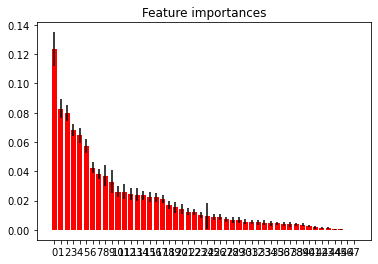

In [111]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
print(indices)
for f in range(X.shape[1]):
    print("%2d. feature %2d %7s (%.3f)" % (f + 1, indices[f], X_df.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), new_df.loc[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [38]:
feature_selection_model = SelectFromModel(forest, prefit=True)

In [39]:
X_selected_features_forest = feature_selection_model.transform(X)
X_selected_features_forest.shape

(506, 2)

At this point, it would be interesting to compare the performance of our target regression algorithm on the reduced datasets. Note that, for wrapper feature selection the target algorithm and the algorithm used for selection usually coincide since wrapper approaches target selection for a specific algorithm and this should be the same later used for mining.

In [41]:
forest_model = linear_model.LinearRegression()
forest_scores = cross_val_score(forest_model, X_selected_features_forest, y, cv=kfolds)
print("RF Selected Features Model R2 Mean %.3f StdDev %.3f"%(forest_scores.mean(),forest_scores.std()))

RF Selected Features Model R2 Mean 0.590 StdDev 0.145


# Section 4
specifying the model and train

In [118]:
# defining the targer and input
target_variable = 'aircon_sum_target_next14d'
input_variables = new_df.columns[new_df.columns!=target_variable]

X = new_df[input_variables]
y = new_df[target_variable]

In [119]:
# seed the random set to be consistant 
np.random.seed(1234)
# do the train test splitting
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,\
    test_size= 1/3.0, random_state =1234, shuffle=True)
# cross validation using k-fold here 10
crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

2- do two different set for standardization and normalization for sake of comparison

In [120]:
st_x= StandardScaler()
X_train_standard = st_x.fit_transform(X_train) 
X_test_standard = st_x.fit_transform(X_test) 
norm_x = MinMaxScaler()
X_train_norm = norm_x.fit_transform(X_train)
X_test_norm = norm_x.fit_transform(X_test)

In [121]:
n_estimators = 50

methods = {
#     'Lasso':LogisticRegression(penalty="l1",C=100, random_state=1234, max_iter=300, solver="liblinear"),
#     'NaiveBayes':GaussianNB(),
#     'k-NN(5)':KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree'),
    'Decision Tree':DecisionTreeClassifier(max_depth=None),
#     'Bagging(Tree)':BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators),
#     'Bagging(kNN)':BaggingClassifier(KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree'),n_estimators=n_estimators),
#     'Random Forest':RandomForestClassifier(n_estimators=n_estimators,max_depth=3,oob_score=True),
#     'Extremely Randomized Trees':ExtraTreesClassifier(n_estimators=n_estimators,max_depth=3),
#     'Ada Boost':AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators)
}

## Desision Tree
here we do three different comparisions 

In [122]:
train_model(methods, X_train, y_train, X_test, y_test)

                           Decision Tree
	  Accuracy (CV) 0.995 0.000
	Accuracy (Test) 0.425
	      Precision 0.425
	      Recall    0.424
	      F1        0.424




In [ ]:
train_model(methods, X_train_standard,y_train, X_test_standard, y_test)

In [ ]:
train_model(methods, X_train_norm,y_train, X_test_norm, y_test)

## Result 
based on these three evaluation normalization is not a good approach for tree if we want to use tree we have to think of better cleaning the features. 